## New model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data=pd.read_csv('bread basket.csv')

In [3]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
data.shape

(20507, 5)

In [5]:
data.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
data.isna().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

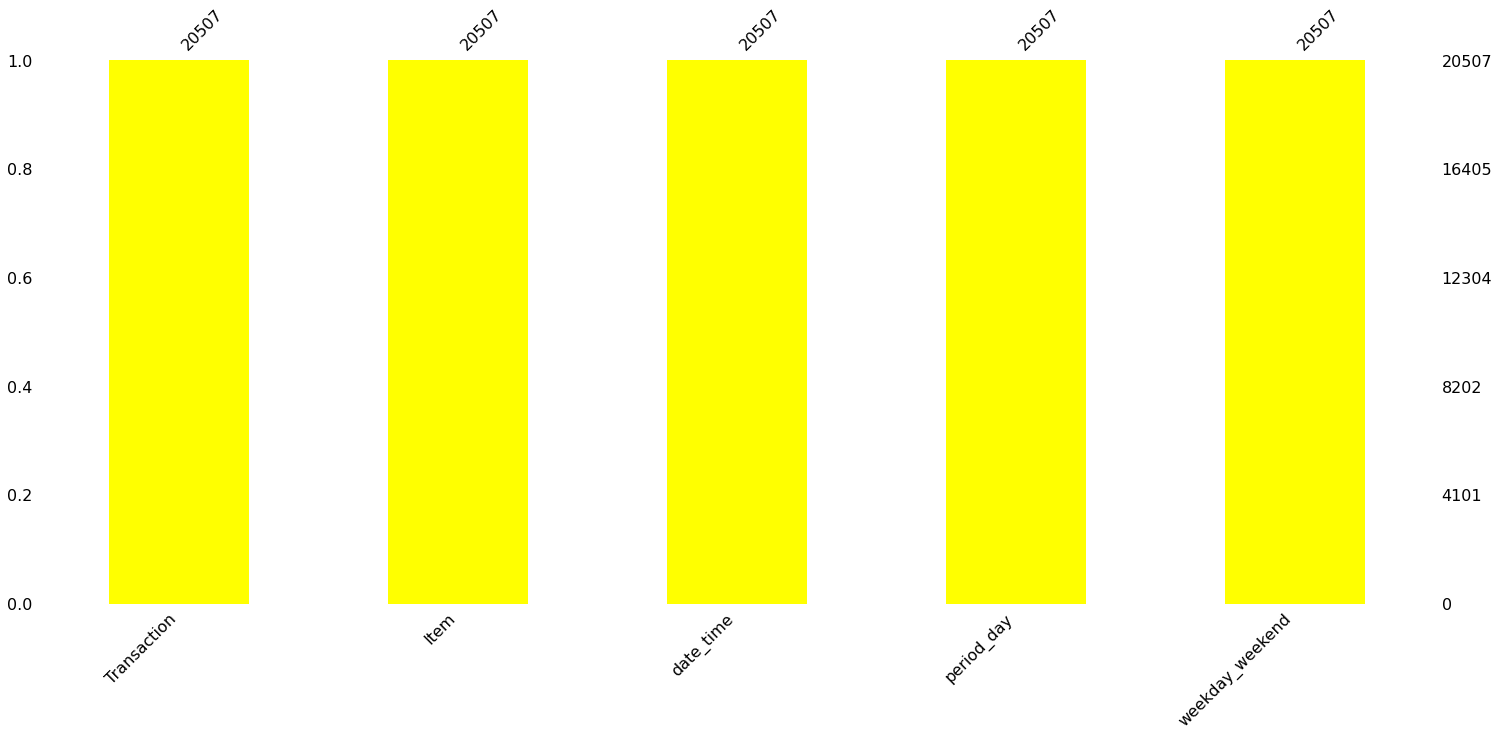

In [8]:
msno.bar(data,color='yellow')

In [9]:
data['date_time']=pd.to_datetime(data['date_time'])

In [10]:
data['date']= data['date_time'].dt.date

In [11]:
data['time']=data['date_time'].dt.time

In [12]:
data['month']=data['date_time'].dt.month
data['month']=data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),
                                   ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [13]:
data['day']=data['date_time'].dt.weekday

In [14]:
data['day']=data['day'].replace((0,1,2,3,4,5,6),
                               ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [15]:
data['hour']=data['date_time'].dt.hour

In [16]:
data.drop('date_time',axis=1,inplace=True)

In [17]:
data.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,day,hour
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,Sunday,9
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,Sunday,10
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,Sunday,10


##### Transaction per hour of the day

In [18]:
countbyhour=data.groupby('hour')['Transaction'].count().reset_index()

In [19]:
countbyhour.head()

,hour,Transaction
0,1,1
1,7,24
2,8,645
3,9,1966
4,10,2666


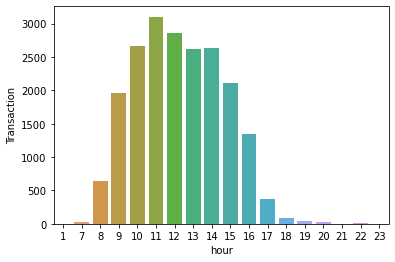

In [20]:
sns.barplot(x=countbyhour['hour'],y=countbyhour['Transaction'])

##### Transaction by day period

In [21]:
countbyweekday=data.groupby('period_day')['Transaction'].count().reset_index()
countbyweekday

,period_day,Transaction
0,afternoon,11569
1,evening,520
2,morning,8404
3,night,14


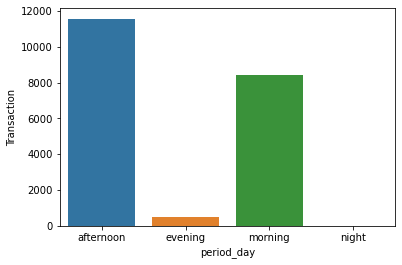

In [22]:
sns.barplot(x=countbyweekday['period_day'],y=countbyweekday['Transaction'])

Conclusion: Most of the People prefer to order in morning and afternoon

##### Transaction per day of the week

In [23]:
countbydayp=data.groupby('day')['Transaction'].count().reset_index()
countbydayp

,day,Transaction
0,Friday,3266
1,Monday,3035
2,Saturday,3554
3,Sunday,3118
4,Thursday,2601
5,Tuesday,2645
6,Wednesday,2288


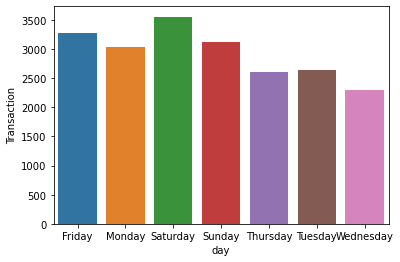

In [24]:
sns.barplot(x=countbydayp.iloc[:,0],y=countbydayp.iloc[:,1])

Conclusion: people are like to buy saturday,friday

##### Transaction by week period

In [25]:
f=data['weekday_weekend'].value_counts().reset_index()


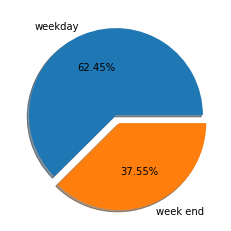

In [26]:
plt.pie(data['weekday_weekend'].value_counts(),
       autopct = "%.2f%%",
       shadow=True,
       explode=[0,0.1],
       labels=['weekday','week end'])
plt.show()

People prefer to order in weekdays

##### Mostly transactions are on weekends, as we saw earlier in our graph.



In [44]:
day=data.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)


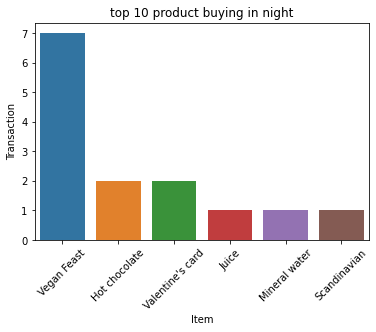

In [99]:
night=day[day['period_day']=='night']
sns.barplot(x=night['Item'],y=night['Transaction'])
plt.title('top 10 product buying in night')
plt.xticks(rotation=45)
plt.show()

In [79]:
afternoon= day[day['period_day']=='afternoon']
afternoon=afternoon.sort_values(by='Transaction',ascending=False)

In [84]:
afternoon=afternoon.head(10)

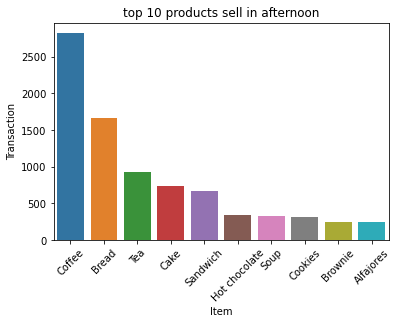

In [98]:
sns.barplot(x=afternoon['Item'],y=afternoon['Transaction'])
plt.xticks(rotation=45)
plt.title('top 10 products sell in afternoon')
plt.show()

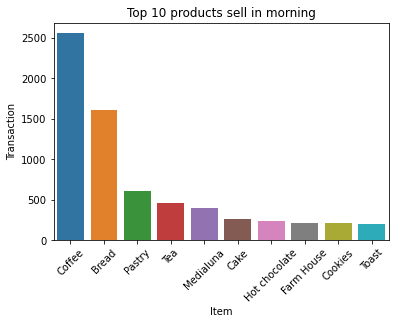

In [97]:
morning= day[day['period_day']=='morning'].sort_values(by='Transaction',ascending=False)
morning=morning.head(10)
sns.barplot(x=morning['Item'],y=morning['Transaction'])
plt.title('Top 10 products sell in morning')
plt.xticks(rotation=45)
plt.show()


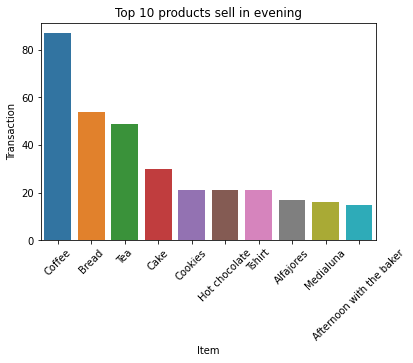

In [100]:
evening=day[day['period_day']=='evening']
evening=evening.head(10)
sns.barplot(x=evening['Item'],y=evening['Transaction'])
plt.title('Top 10 products sell in evening')
plt.xticks(rotation=45)
plt.show()

##### Transaction by Month

In [27]:
countbymonth=data.groupby('month')['Transaction'].count().reset_index()
countbymonth

,month,Transaction
0,April,1048
1,August,700
2,December,2647
3,February,2748
4,January,3027
5,July,741
6,June,739
7,March,3220
8,May,924
9,November,3076


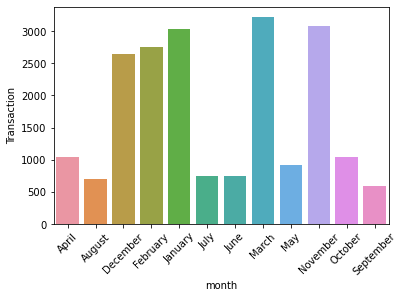

In [28]:
sns.barplot(x=countbymonth['month'],y=countbymonth['Transaction'])
plt.xticks(rotation=45)
plt.show()

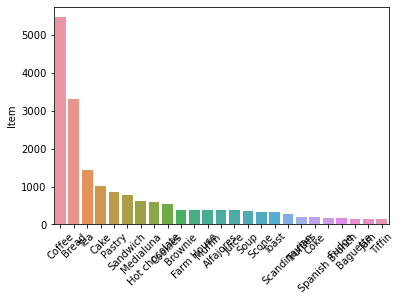

In [29]:
names=data.Item.value_counts().head(25).index
values=data.Item.value_counts().head(25)
sns.barplot(x=names,y=values)
plt.xticks(rotation=45)
plt.show()

Top sold item where: coffee,bread,tea
least sell: tiffin,jam

##### Apriori algorithm

In [30]:
from mlxtend.frequent_patterns import association_rules,apriori

In [31]:
transaction=data.groupby(['Transaction','Item'])['Item'].count().reset_index(name='Count')
transaction

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [32]:
table=transaction.pivot_table(index='Transaction',columns='Item',values='Count',aggfunc='sum').fillna(0)

In [33]:
table.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def hot_encode(x):
    if x==0:
        return 0
    elif x>0:
        return 1

In [35]:
final_table=table.applymap(hot_encode)

In [36]:
final_table.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequency=apriori(final_table,min_support=0.015,
                 use_colnames=True)

In [38]:
rules=association_rules(frequency,metric='lift',min_threshold=1)

In [39]:
rules.sort_values('confidence',ascending=False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
17,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
20,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
22,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
24,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
10,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
12,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553


In [40]:
# arranging the data from highest to lowest with respect to 'confidence'
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
17,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
20,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
22,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
24,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
10,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
12,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553


As per the above table we can analyse that coffee is an item that is very associated with other purched items in the bakery, such as toast,medialuana and pastry.